IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME09: algorithme des k-moyennes

L'objectif de ce notebook est d'implémenter l'algorithme des K-moyennes.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang Zhang et Antoine Lecomte

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-09-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [190]:
# - - - - - - - - - - - - - - - - - -
# imports utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline  

import math
import time
import sys

# Les instructions suivantes sont utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - -
# Information sur l'environnent utilisé ici:
print("Version python et des librairies:")
print("\tPython ",sys.version)
print("\tpandas: ",pd.__version__)
print("\tnumpy: ",np.__version__)
print("\tmatplotlib: ",mtpl.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Version python et des librairies:
	Python  3.11.2 (main, Nov 30 2024, 21:22:50) [GCC 12.2.0]
	pandas:  2.2.0
	numpy:  1.24.2
	matplotlib:  3.6.3


## Préparation 

Si vous ne l'avez pas fait lors de la séance précédente, commencer par créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`.
Utilisez les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajoutez dans ce fichier les fonctions écrites dans le TDTME 8:
- normalisation
- dist_euclidienne
- centroide, dist_centroides
- initialise, fusionne, clustering_hierarchique
- toutes les autres fonctions écrites

**Remarque**: il est nécessaire d'ajouter des imports utilisés dans le TDTME 8 dans le fichier `Clustering.py`.

Pensez aussi à ajouter vos fonctions pour contruire les arbres de décision numériques dans votre fichier `Classifiers.py`.

In [191]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust


## Travail à réaliser
Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

Les 2 bases citées ont été fournies dans le TDTME 8, afin de ne pas les recopier, vous pouvez créer un <a href="https://fr.wikipedia.org/wiki/Lien_symbolique">lien symbolique</a> dans votre répertoire `tme-09` pour accéder au répertoire `data` du `tme-08`:

Placez-vous dans votre répertoire `tme-09` dans le terminal puis tapez:

    ln -s ../tme-08/data .
    
Une fois créé, si vous tapez `ls data` dans le répertoire `tme-09` vous aurez l'affichage du contenu du répertoire et les 2 bases seront accessibles directement par `data/base-2D.csv` et `data/base-Paris.csv`.




**Attention**: dans ce notebook, vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.


### Données d'expérimentation

Commencer par charger le fichier <code>base_2D.csv</code> qui permettra d'expérimenter vos fonctions. Dans ce qui suit, on note <code>data_2D</code> le dataframe qui contient les données de ce fichiers.


In [192]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5] 

,X1,X2
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


### Vérification

On vérifie que tout est ok avec la librairie:

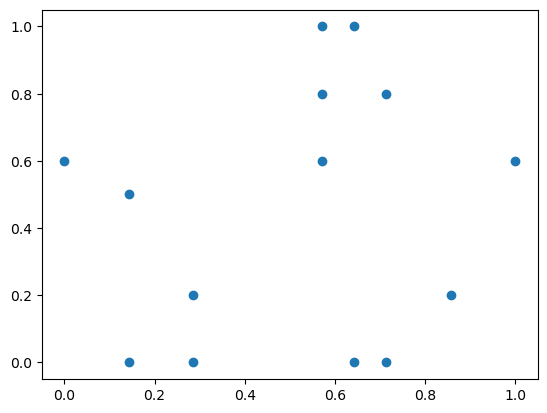

In [193]:
data_2D_norm = clust.normalisation(data_2D)

plt.scatter(data_2D_norm['X1'],data_2D_norm['X2'],)

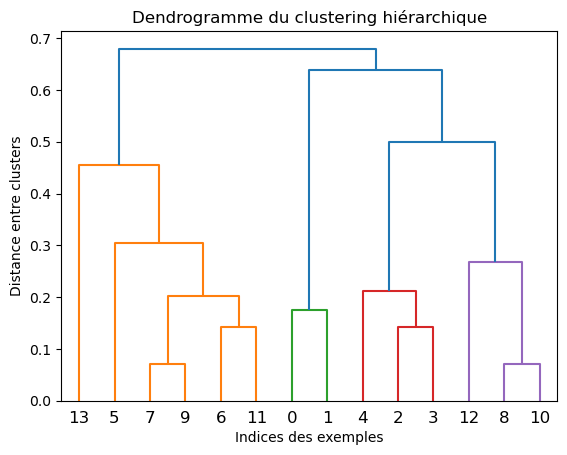

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

In [194]:
clust.CHA_centroid(data_2D_norm,verbose=False,dendrogramme=True)

In [195]:
print("Centroide de toutes les données de la base:\n",clust.centroide(data_2D_norm))

Centroide de toutes les données de la base:
 X1    0.510204
X2    0.450000
dtype: float64


## Implémentation des k-moyennes

### Inertie d'un cluster
<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>inertie_cluster</code> qui, étant donné un  ensemble d'exemples (sous la forme d'un dataframe ou d'un np.array) contenant au moins 2 exemples, rend la valeur de l'inertie de cet ensemble telle qu'elle a été définie dans le cours.

In [196]:
def inertie_cluster(Ens):
    """ Array -> float
        Ens: array qui représente un cluster
        Hypothèse: len(Ens)> >= 2
        L'inertie est la somme (au carré) des distances des points au centroide.
    """

    Ens = np.array(Ens)
    
    # Calcul du centroïde
    centre = np.mean(Ens, axis=0)

    # Calcul des distances au carré de chaque point au centroïde
    distances_carre = np.sum((Ens - centre) ** 2, axis=1)

    # Inertie = somme des distances au carré
    return np.sum(distances_carre)

In [197]:
print(f"inertie de l'ensemble : {inertie_cluster(data_2D_norm):1.4f}")


inertie de l'ensemble : 2.9760


<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>init_kmeans()</code> qui étant donné un entier $K>1$ et une base d'apprentissage de $n$ exemples rend un np.array composés de $K$ exemples tirés aléatoirement dans la base. On fait l'hypothèse que $K\leq n$.

**Remarque**: étudier les fonctions de la librairie random de Python...


In [198]:
def init_kmeans(K,Ens):
    """ int * Array -> Array
        K : entier >1 et <=n (le nombre d'exemples de Ens)
        Ens: Array contenant n exemples
    """

    indices = np.random.choice(len(Ens), size=K, replace=False)
    return Ens.iloc[indices] 
    

In [199]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = init_kmeans(3,data_2D_norm)
Centroides_test

,X1,X2
9,0.642857,1.0
11,0.714286,0.8
0,0.000000,0.6


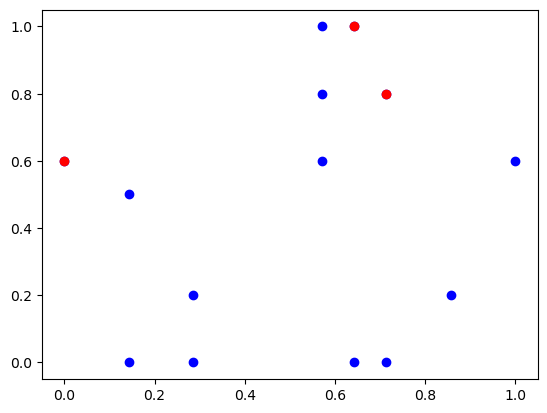

In [200]:
Centroides_np = Centroides_test.to_numpy()
plt.scatter(data_2D_norm['X1'], data_2D_norm['X2'], color='blue')
plt.scatter(Centroides_np[:, 0], Centroides_np[:, 1], color='red')

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>plus_proche()</code> qui, étant donné un exemple et un array contenant un ensemble de centroides, rend l'indice du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [201]:
def plus_proche(Exe,Centres):
    """ Array * Array -> int
        Exe : Array contenant un exemple
        Centres : Array contenant les K centres
    """

    # Calcul des distances euclidiennes entre Exe et chaque centre
    distances = np.linalg.norm(Centres - Exe, axis=1)
    return np.argmin(distances)
    

In [202]:
# Exemple (vérifier le résultat avec l'affichage graphique réalisé précédemment):
for i in range(0,len(data_2D_norm)):
    pproche = plus_proche(data_2D_norm.iloc[i],Centroides_test)
    print("L'exemple ",i," est le plus proche du centroide ",pproche)

L'exemple  0  est le plus proche du centroide  2
L'exemple  1  est le plus proche du centroide  2
L'exemple  2  est le plus proche du centroide  2
L'exemple  3  est le plus proche du centroide  2
L'exemple  4  est le plus proche du centroide  2
L'exemple  5  est le plus proche du centroide  1
L'exemple  6  est le plus proche du centroide  1
L'exemple  7  est le plus proche du centroide  0
L'exemple  8  est le plus proche du centroide  1
L'exemple  9  est le plus proche du centroide  0
L'exemple  10  est le plus proche du centroide  1
L'exemple  11  est le plus proche du centroide  1
L'exemple  12  est le plus proche du centroide  1
L'exemple  13  est le plus proche du centroide  1


### Matrice d'affectation

Etant donné une base d'apprentissage, on représente une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) et telle que les contraintes suivantes sont vérifiées: 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


<font size="+1" color="RED"><b>[Q]</b></font>  Donner une expression mathématique (pas du Python) des 2 dernières contraintes que vérifie une matrice d'affectation.

- **Un exemple appartient à un et un seul cluster** :  
  ∀ *i* ∈ {1,…,n}, ∑<sub>j=1</sub><sup>K</sup> U[i,j] = 1

- **Un cluster contient au moins un exemple** :  
  ∀ *j* ∈ {1,…,K}, ∑<sub>i=1</sub><sup>n</sup> U[i,j] ≥ 1

### Implémentation en Python
Nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux $K$ indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>affecte_cluster()</code> qui, étant donné une base d'apprentissage et un ensemble de $K$ centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [203]:
def affecte_cluster(Base,Centres):
    """ Array * Array -> dict[int,list[int]]
        Base: Array contenant la base d'apprentissage
        Centres : Array contenant des centroides
    """
    
    # Initialisation d'un dictionnaire pour l'affectation
    affectation = {i: [] for i in range(len(Centres))}
    
    # Pour chaque exemple de la base, on l'affecte au cluster du centroïde le plus proche
    for i, exemple in enumerate(Base.values):
        # Trouver l'indice du centroïde le plus proche
        indice_cluster = plus_proche(exemple, Centres)
        # Ajouter cet exemple à la liste du cluster correspondant
        affectation[indice_cluster].append(i)
    
    return affectation  
    

In [204]:
DictAffect = affecte_cluster(data_2D_norm, Centroides_test)
DictAffect

{0: [7, 9], 1: [5, 6, 8, 10, 11, 12, 13], 2: [0, 1, 2, 3, 4]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>nouveaux_centroides()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [205]:
def nouveaux_centroides(Base,U):
    """ Array * dict[int,list[int]] -> DataFrame
        Base : Array contenant la base d'apprentissage
        U : Dictionnaire d'affectation
    """
    
    centroides = []
    
    # Pour chaque cluster (chaque clé dans U)
    for cluster, indices in U.items():
        # Sélectionner les exemples appartenant au cluster
        cluster_data = Base.iloc[indices] if isinstance(Base, pd.DataFrame) else Base[indices]
        
        # Calculer le centroïde du cluster (moyenne des exemples)
        centroide = cluster_data.mean(axis=0)
        
        # Ajouter le centroïde à la liste
        centroides.append(centroide)
    
    # Convertir la liste des centroïdes en DataFrame
    nouveaux_centroides_df = pd.DataFrame(centroides)
    
    return nouveaux_centroides_df     

In [206]:
data_2D_norm.iloc[DictAffect[0]]

,X1,X2
7,0.571429,1.0
9,0.642857,1.0


In [207]:
clust.centroide(data_2D_norm.iloc[DictAffect[0]])

X1    0.607143
X2    1.000000
dtype: float64

In [208]:
nouveaux_centroides(data_2D_norm, DictAffect)

,X1,X2
0,0.607143,1.000000
1,0.724490,0.428571
2,0.171429,0.260000


### Inertie globale d'une partition

<font size="+1" color="RED"><b>[Q]</b></font>  En utilisant la fonction `inertie_cluster()`, écrire la fonction `inertie_globale()` qui, étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [209]:
def inertie_globale(Base, U):
    """ Array * dict[int,list[int]] -> float
        Base : Array pour la base d'apprentissage
        U : Dictionnaire d'affectation
    """
    
    inertie_totale = 0.0
    
    # Parcours des clusters dans U
    for cluster_id, indices in U.items():
        # Récupération des points du cluster à partir de Base
        points = Base.iloc[indices]  # Utilise .iloc pour accéder aux lignes par index
        
        # Calcul de l'inertie pour ce cluster avec la fonction inertie_cluster
        inertie_totale += inertie_cluster(points)
    
    return inertie_totale

In [210]:
print(f'Inertie globale: {inertie_globale(data_2D_norm,DictAffect):1.4f}')

Inertie globale: 1.2732


### Algorithme des K-moyennes

<font size="+1" color="RED"><b>[Q]</b></font>  En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Pour cela, écrire une fonction <code>kmoyennes()</code> qui prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* sert de critère de convergence, et l'entier *iter_max* est utilisé pour fixer un nombre d'itérations maximal servant à arrêter le calcul.

In [211]:
def kmoyennes(K, Base, epsilon, iter_max):
    """ int * Array * float * int -> tuple(Array, dict[int,list[int]])
        K : entier > 1 (nombre de clusters)
        Base : DataFrame pour la base d'apprentissage
        epsilon : réel >0 (critère de convergence)
        iter_max : entier >1 (nombre d'itérations maximal)
    """
    
    # Initialisation des centroids : on choisit aléatoirement K points de la base
    indices_initials = np.random.choice(Base.shape[0], K, replace=False)
    centroids = Base.iloc[indices_initials].values  # Utilise .iloc[] pour accéder aux lignes

    # Initialisation de la matrice d'affectation
    DictAffect = {i: [] for i in range(K)}

    # Calcul de l'inertie initiale
    inertie_precedente = 1 + epsilon

    for iteration in range(iter_max):
        # 1. Assignation des points aux clusters
        DictAffect = {i: [] for i in range(K)}  # On réinitialise les clusters
        for i, point in enumerate(Base.values):
            # Calcul des distances au centroid le plus proche
            distances = np.linalg.norm(centroids - point, axis=1)
            cluster_id = np.argmin(distances)
            DictAffect[cluster_id].append(i)
        
        # 2. Mise à jour des centroids
        nouveaux_centroids = np.zeros_like(centroids)
        for i in range(K):
            # Calcul du centroïde de chaque cluster (moyenne des points)
            if len(DictAffect[i]) > 0:
                nouveaux_centroids[i] = np.mean(Base.iloc[DictAffect[i]].values, axis=0)

        # 3. Calcul de l'inertie pour cette itération
        inertie_actuelle = 0
        for i in range(K):
            cluster_points = Base.iloc[DictAffect[i]].values
            inertie_actuelle += inertie_cluster(cluster_points)

        # 4. Calcul de la différence avec l'inertie précédente
        difference_inertie = abs(inertie_actuelle - inertie_precedente)  # Utiliser la valeur absolue

        # Affichage de l'inertie et de la différence
        print(f"Iteration {iteration + 1} Inertie : {inertie_actuelle:.4f} Difference: {difference_inertie:.4f}")

        # Critère de convergence : vérifier si l'inertie a suffisamment diminué
        if difference_inertie < epsilon:
            break

        # Mettre à jour les centroids et l'inertie précédente pour la prochaine itération
        centroids = nouveaux_centroids
        inertie_precedente = inertie_actuelle

    return centroids, DictAffect

In [212]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(2, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 2.2482 Difference: 1.1982
Iteration 2 Inertie : 1.5128 Difference: 0.7354
Iteration 3 Inertie : 1.3921 Difference: 0.1207
Iteration 4 Inertie : 1.3921 Difference: 0.0000
Affichage des centres:  [[0.67857143 0.8       ]
 [0.38392857 0.1875    ]]
Affichage des affectations:  {0: [5, 6, 7, 9, 11, 13], 1: [0, 1, 2, 3, 4, 8, 10, 12]}


In [213]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 1.2732 Difference: 0.2232
Iteration 2 Inertie : 0.9095 Difference: 0.3637
Iteration 3 Inertie : 0.8127 Difference: 0.0968
Iteration 4 Inertie : 0.8127 Difference: 0.0000
Affichage des centres:  [[0.61428571 0.84      ]
 [0.80357143 0.2       ]
 [0.17142857 0.26      ]]
Affichage des affectations:  {0: [5, 6, 7, 9, 11], 1: [8, 10, 12, 13], 2: [0, 1, 2, 3, 4]}


On peut réaliser un affichage couleur des centroïdes trouvés:

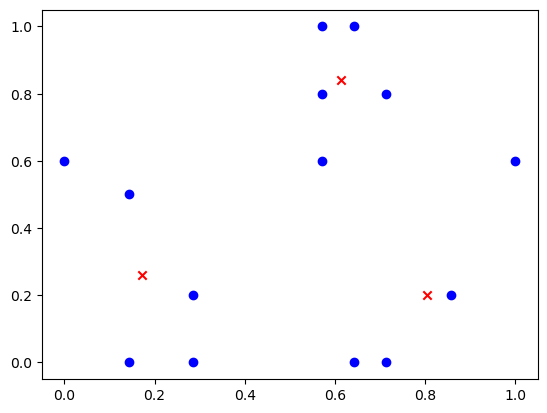

In [214]:
plt.scatter(data_2D_norm['X1'],data_2D_norm['X2'],color='b')
plt.scatter(les_centres[:,0],les_centres[:,1],color='r',marker='x')

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>affiche_resultat()</code> qui permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K est inférieur à 20).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

Par exemple, on peut utiliser la table des couleurs (colormap) de nom `tab20` qui contient 20 couleurs différentes.

nombre de couleurs différentes 20


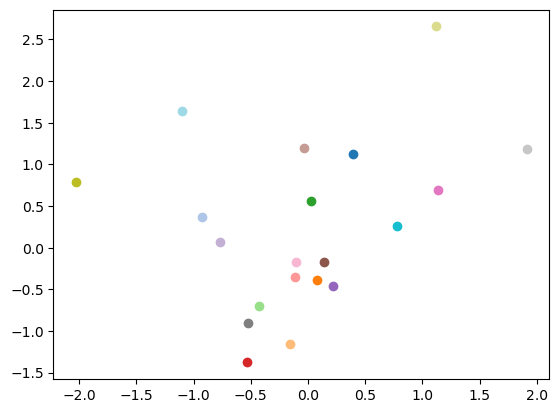

In [215]:
# Librairie pour manipuler les colormaps:
import matplotlib.cm as cm

# on transforme le colormap en couleurs utilisable par plt.scatter:
couleurs = cm.tab20(np.linspace(0, 1, 20))

print("nombre de couleurs différentes",len(couleurs))

# Pour voir ces couleurs, on va afficher 20 points aléatoirement définis:
x = np.random.randn(len(couleurs))
y = np.random.randn(len(couleurs))       

for (x,y,c) in zip(x,y,couleurs):
    plt.scatter(x, y, color=c)
    

In [216]:
import matplotlib.cm as cm

def affiche_resultat(Base,Centres,Affect):
    """ DataFrame **2 * dict[int,list[int]] -> None
    """

    # Nombre de clusters K
    K = len(Centres)

    # On récupère les couleurs de la colormap 'tab20' (maximum 20 couleurs)
    couleurs = cm.tab20(np.linspace(0, 1, 20))

    # Création de la figure et des axes pour l'affichage
    plt.figure(figsize=(8, 6))

    # Pour chaque cluster, on affiche les points avec la couleur correspondante
    for cluster_id in range(K):
        # Récupérer les indices des points appartenant à ce cluster
        indices = Affect[cluster_id]
        # Extraire les points de Base correspondants
        points_cluster = Base.iloc[indices]
        
        # Tracer les points du cluster avec la couleur correspondante
        plt.scatter(points_cluster.iloc[:, 0], points_cluster.iloc[:, 1], 
                    color=couleurs[cluster_id], label=f'Cluster {cluster_id+1}')
        
        # Afficher le centre du cluster en rouge et en plus gros
        plt.scatter(Centres[cluster_id, 0], Centres[cluster_id, 1], 
                    color='red', marker='x', s=100, label=f'Centre {cluster_id+1}')

    # Ajouter des légendes, titre et axes
    plt.title('Résultats de l\'algorithme K-means')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    
    # Affichage du graphique
    plt.show()   

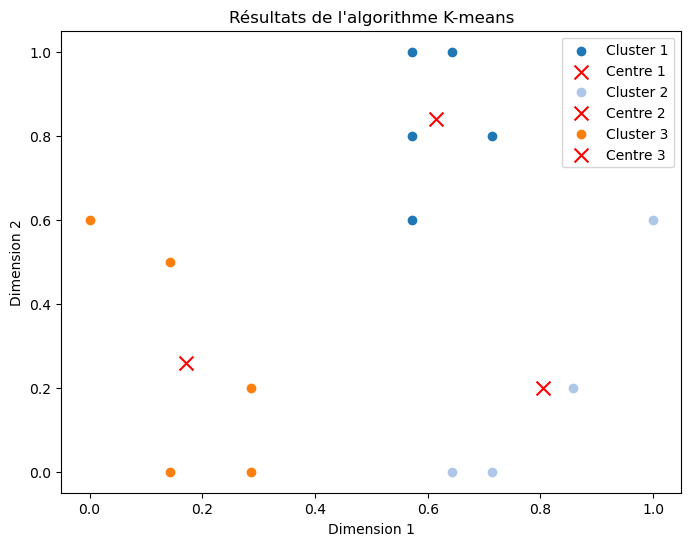

In [217]:
affiche_resultat(data_2D_norm,les_centres,l_affectation)

# Remarque:
#  - les centres sont représentés par des croix rouges

## Données différentes

Il y a 23 exemples dans la base.


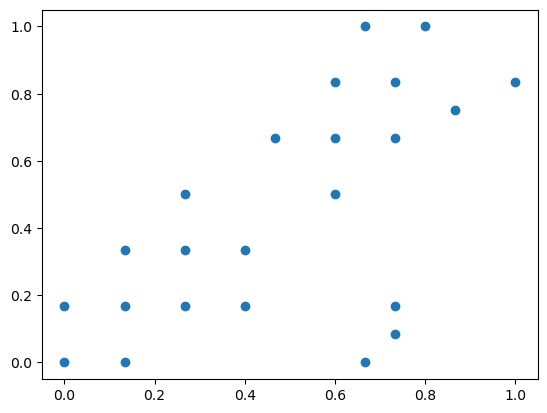

In [218]:
data_2D_diff = clust.normalisation(pd.read_csv("data/base-2D-diff.csv"))
# ------------------------ 

print("Il y a", len(data_2D_diff), "exemples dans la base.")

data_2D_diff

plt.scatter(data_2D_diff['X1'],data_2D_diff['X2'],)


Iteration 1 Inertie : 1.1380 Difference: 0.0880
Iteration 2 Inertie : 0.9876 Difference: 0.1504
Iteration 3 Inertie : 0.9679 Difference: 0.0197
Affichage des centres:  [[0.71851852 0.80555556]
 [0.50833333 0.26041667]
 [0.11111111 0.13888889]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [7, 8, 9, 11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6]}


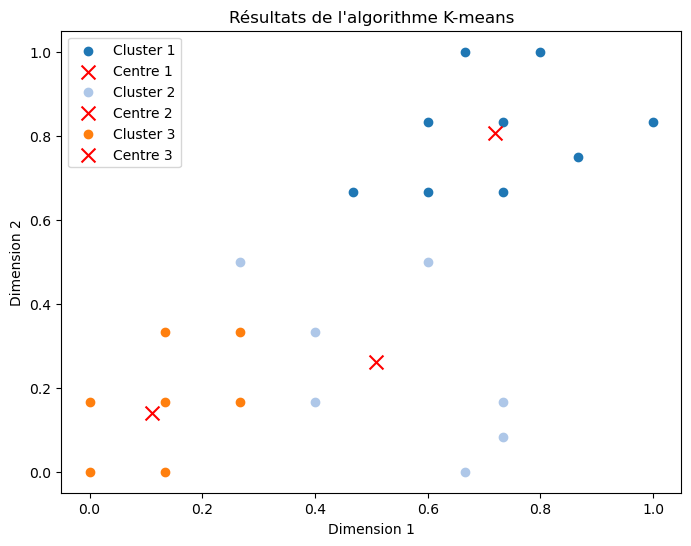

In [219]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_2D_diff,les_centres,l_affectation)


Iteration 1 Inertie : 0.9093 Difference: 0.1407
Iteration 2 Inertie : 0.9093 Difference: 0.0000
Affichage des centres:  [[0.71851852 0.80555556]
 [0.68333333 0.1875    ]
 [0.2        0.21666667]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


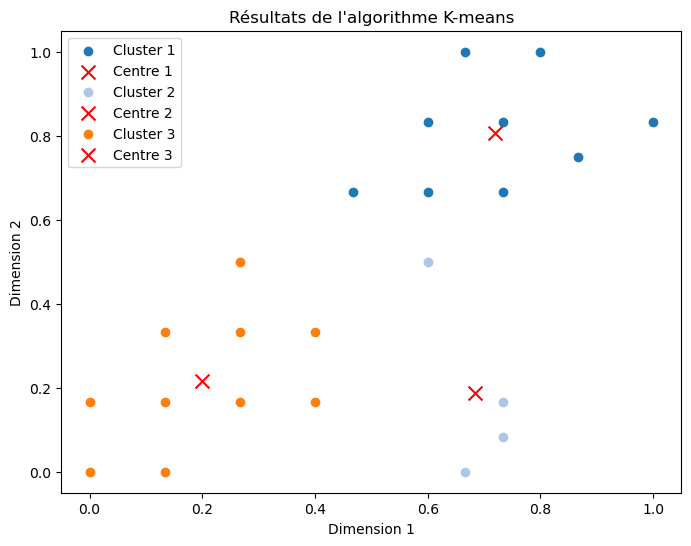

In [220]:
np.random.seed(1)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_2D_diff,les_centres,l_affectation)


## Beaucoup de points...

On essaye en générant aléatoire 1000 points, toujours en 2 dimensions.
Pour cela, on reprend la fonction `nb.random.multivariate_normal` que l'on a déjà utilisé dans le TME 2. On va générer la moitié des points selon une gaussienne centrée sur $(2,1)$ et l'autre moitié des points selon une gaussienne centrée sur $(-2-2)$. De cette façon, on créé artificiellement 2 paquets de points et on va regarder si l'algorithme des k-moyennes peut arriver à les retrouver.

Taille du dataset généré : 1000 exemples


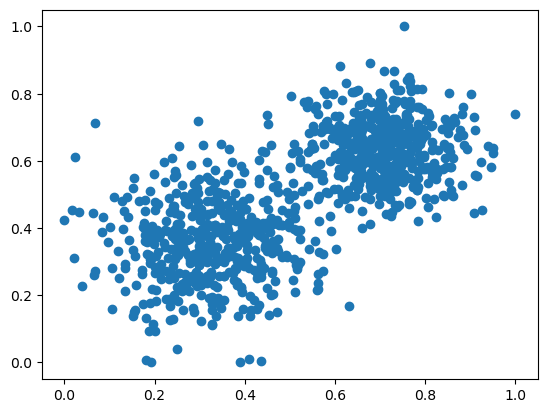

In [221]:
np.random.seed(42)   # on prend 42 comme graine


nb_points = 500 

# génération des groupes de points 
cluster1_centre = np.array([2,1])
cluster1_sigma = np.array([[1,0],[0,1]])
cluster2_centre = np.array([-2,-2])
cluster2_sigma = np.array([[1.5,0],[0,1.5]])
cluster1_points = np.random.multivariate_normal(cluster1_centre,cluster1_sigma,nb_points)
cluster2_points = np.random.multivariate_normal(cluster2_centre,cluster2_sigma,nb_points)

# on stocke les points dans un dataframe (en les normalisant)
desc = np.concatenate((cluster1_points, cluster2_points))
data_rand = clust.normalisation(pd.DataFrame(desc,columns=['X1','X2']))
    
print("Taille du dataset généré :", data_rand.shape[0], "exemples")

# Affichage des points obtenus:
plt.scatter(data_rand['X1'],data_rand['X2'])

Iteration 1 Inertie : 48.6840 Difference: 47.6340
Iteration 2 Inertie : 24.8864 Difference: 23.7976
Iteration 3 Inertie : 22.2963 Difference: 2.5901
Iteration 4 Inertie : 22.2080 Difference: 0.0883
Iteration 5 Inertie : 22.2070 Difference: 0.0010
Pour k= 2 
Affichage des centres:  [[0.70030532 0.63310693]
 [0.32219792 0.34976565]]


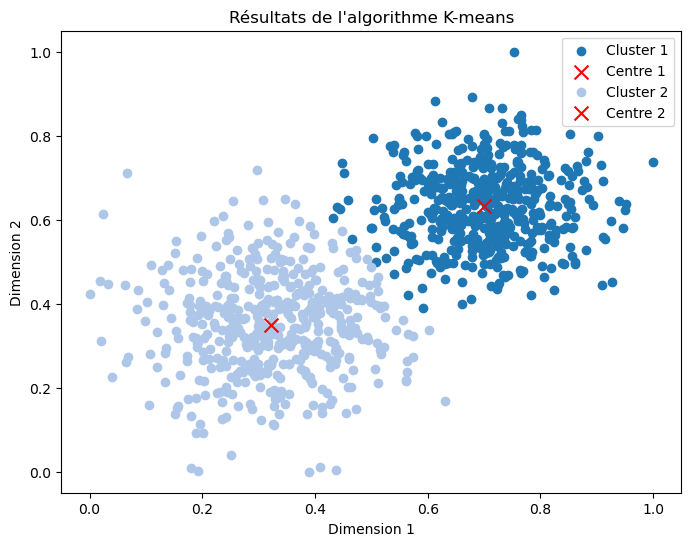

In [222]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

val_k = 2
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


Iteration 1 Inertie : 24.4541 Difference: 23.4041
Iteration 2 Inertie : 15.1172 Difference: 9.3369
Iteration 3 Inertie : 14.9648 Difference: 0.1524
Iteration 4 Inertie : 14.9540 Difference: 0.0108
Pour k= 4 
Affichage des centres:  [[0.70819669 0.63670188]
 [0.19521444 0.37895914]
 [0.34805922 0.24277949]
 [0.39602839 0.45782145]]


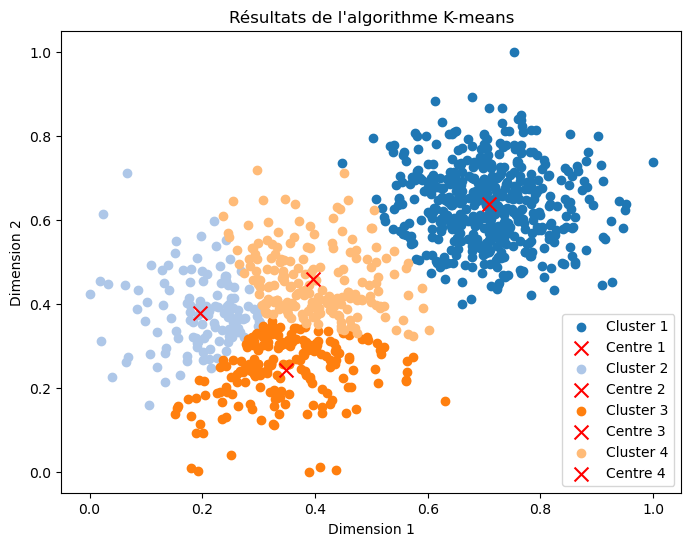

In [223]:
# On peut essayer avec plus de clusters que prévu :

np.random.seed(42)   

val_k = 4
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


Iteration 1 Inertie : 17.5549 Difference: 16.5049
Iteration 2 Inertie : 15.8956 Difference: 1.6593
Iteration 3 Inertie : 15.2664 Difference: 0.6291
Iteration 4 Inertie : 15.0246 Difference: 0.2419
Iteration 5 Inertie : 14.8177 Difference: 0.2069
Iteration 6 Inertie : 14.7204 Difference: 0.0972
Iteration 7 Inertie : 14.6824 Difference: 0.0380
Pour k= 4 
Affichage des centres:  [[0.32764404 0.45910879]
 [0.32185729 0.26648635]
 [0.74272566 0.57193156]
 [0.66051152 0.70375276]]


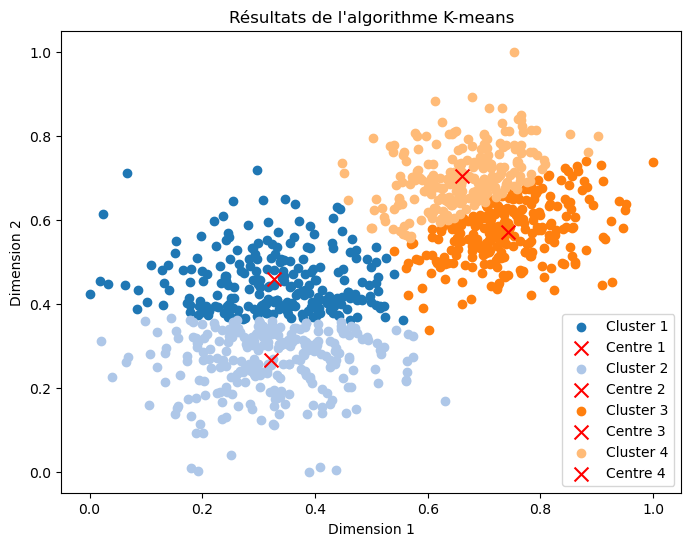

In [224]:
# Autre exécution avec le même k que précédemment

np.random.seed(2023)  

val_k = 4
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


## Expérimentations

<font size="+1" color="RED"><b>[Q]</b></font>  Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.


Iteration 1 Inertie : 10.1689 Difference: 9.1189
Iteration 2 Inertie : 9.5697 Difference: 0.5993
Iteration 3 Inertie : 8.7337 Difference: 0.8360
Iteration 4 Inertie : 8.1341 Difference: 0.5996
Iteration 5 Inertie : 7.8408 Difference: 0.2933
Iteration 6 Inertie : 7.6481 Difference: 0.1927
Iteration 7 Inertie : 7.5484 Difference: 0.0997
Iteration 8 Inertie : 7.4728 Difference: 0.0756
Iteration 9 Inertie : 7.4263 Difference: 0.0465
Pour k= 10 
Affichage des centres:  [[0.24653275 0.44941066]
 [0.42308703 0.34637479]
 [0.83188813 0.56389843]
 [0.59687085 0.70900019]
 [0.27097083 0.23057716]
 [0.68430129 0.50577046]
 [0.6880003  0.62205425]
 [0.48678019 0.55484045]
 [0.79622591 0.70078585]
 [0.7099152  0.79007412]]


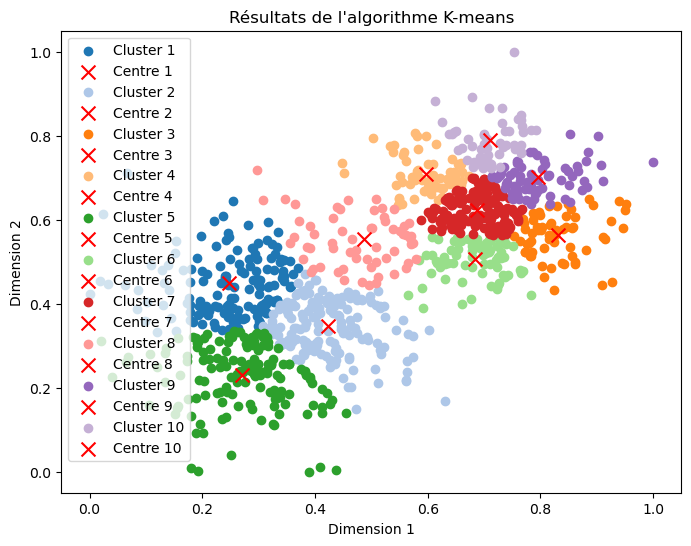

In [225]:
np.random.seed(2023)   

val_k = 10
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)

Iteration 1 Inertie : 4.9194 Difference: 3.8694
Iteration 2 Inertie : 4.0623 Difference: 0.8571
Iteration 3 Inertie : 3.8998 Difference: 0.1625
Iteration 4 Inertie : 3.8188 Difference: 0.0811
Iteration 5 Inertie : 3.7571 Difference: 0.0616
Iteration 6 Inertie : 3.7055 Difference: 0.0517
Iteration 7 Inertie : 3.6843 Difference: 0.0211
Pour k= 20 
Affichage des centres:  [[0.30260454 0.58191826]
 [0.31101216 0.46935351]
 [0.85049297 0.57543395]
 [0.50901929 0.71674031]
 [0.3617789  0.14429687]
 [0.72932865 0.50699576]
 [0.72374731 0.61075654]
 [0.59356545 0.65857964]
 [0.81825131 0.70489232]
 [0.687118   0.69669323]
 [0.4569725  0.27903316]
 [0.27826887 0.24841384]
 [0.62688398 0.78948008]
 [0.27827772 0.34628581]
 [0.16611865 0.18267345]
 [0.38313146 0.38077049]
 [0.73897607 0.80807405]
 [0.14449323 0.42348267]
 [0.48983323 0.44467892]
 [0.61477459 0.55409628]]


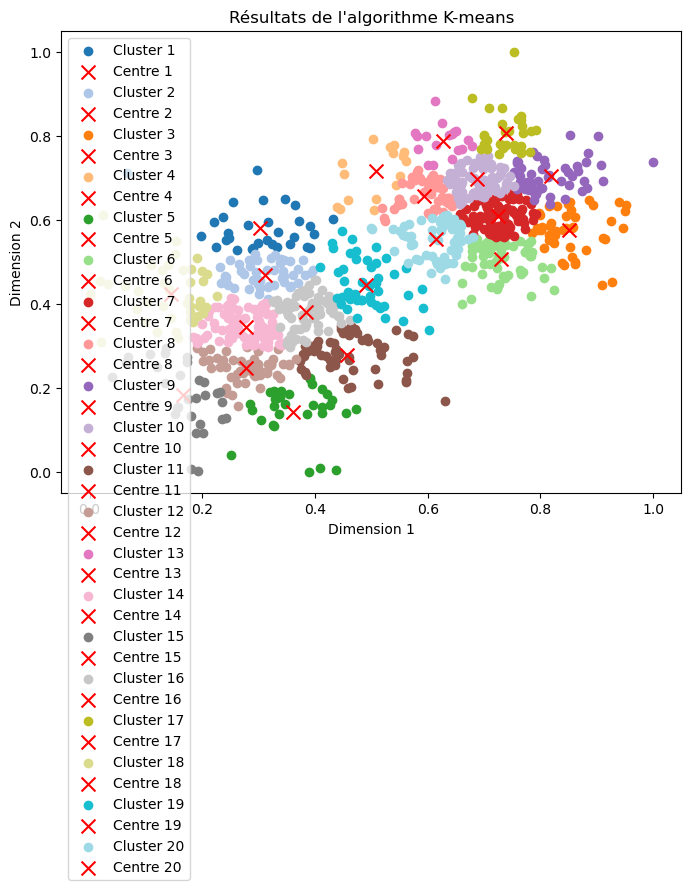

In [226]:
np.random.seed(2023)   

val_k = 20
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)

L'inertie semble diminuer de plus en plus en augmentant progressivement le nombre de clusters K.

- Chaque cluster devient plus petit, et donc les points sont plus proches de leur centre. Par conséquent, l'inertie totale (qui est la somme des distances des points à leurs centres) tend à diminuer.

- L'inertie peut devenir un indicateur trompeur de la qualité des clusters lorsque K est trop élevé car l'inertie continuera de diminuer, mais cela pourrait signifier que l'algorithme ajuste les clusters pour minimiser artificiellement l'inertie sans pour autant donner une segmentation réellement significative.

- Plus de calculs : Avec un K plus élevé, l'algorithme devra effectuer plus de calculs à chaque itération. Cela inclut la mise à jour des centres des clusters, l'affectation des points aux clusters et le calcul de l'inertie. A mesure que K augmente, l'algorithme peut devenir plus lent car il doit trouver des solutions plus complexes (en raison de plus de centres à ajuster et plus de distances à calculer).

- Il devient plus difficile de visualiser les résultats (comme on peut le voir ci-dessous).

Iteration 1 Inertie : 4.9194 Difference: 3.9144
Iteration 2 Inertie : 4.0623 Difference: 0.8571
Iteration 3 Inertie : 3.8998 Difference: 0.1625
Iteration 4 Inertie : 3.8188 Difference: 0.0811
Iteration 5 Inertie : 3.7571 Difference: 0.0616
Iteration 6 Inertie : 3.7055 Difference: 0.0517
Iteration 7 Inertie : 3.6843 Difference: 0.0211
Iteration 8 Inertie : 3.6678 Difference: 0.0165
Iteration 9 Inertie : 3.6480 Difference: 0.0198
Iteration 10 Inertie : 3.6180 Difference: 0.0300
Iteration 11 Inertie : 3.5613 Difference: 0.0567
Iteration 12 Inertie : 3.4978 Difference: 0.0635
Iteration 13 Inertie : 3.4754 Difference: 0.0223
Iteration 14 Inertie : 3.4666 Difference: 0.0089
Iteration 15 Inertie : 3.4585 Difference: 0.0081
Iteration 16 Inertie : 3.4517 Difference: 0.0068
Iteration 17 Inertie : 3.4467 Difference: 0.0050
Pour k= 20 
Affichage des centres:  [[0.29182273 0.58454563]
 [0.31468787 0.46279886]
 [0.8596204  0.56060762]
 [0.50099978 0.62056232]
 [0.36651754 0.14865372]
 [0.72948925 0.

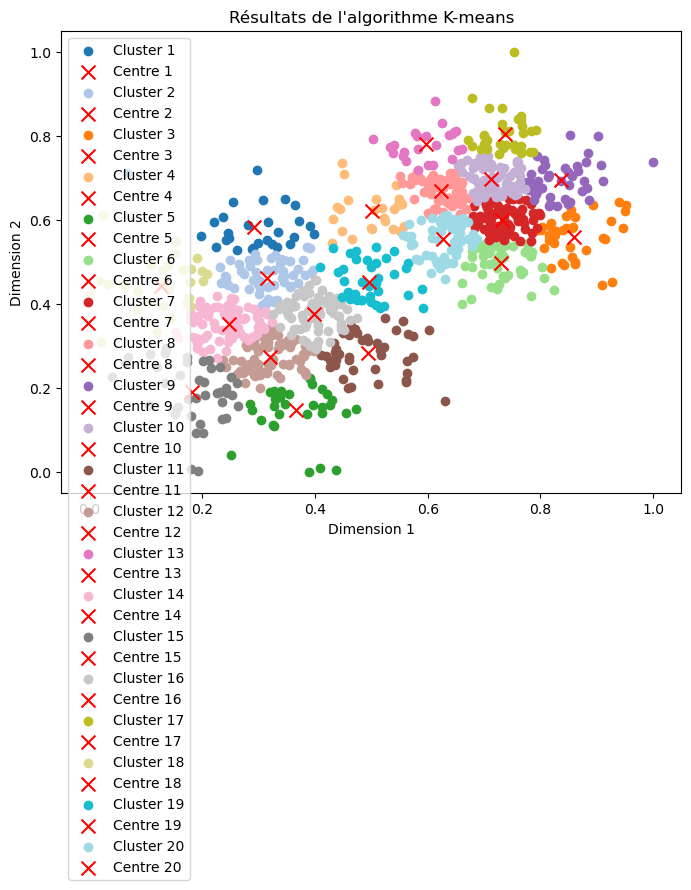

In [227]:
# On divise epsilon par 10

np.random.seed(2023)   

val_k = 20
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.005, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)

Iteration 1 Inertie : 4.9194 Difference: 3.9189
Iteration 2 Inertie : 4.0623 Difference: 0.8571
Iteration 3 Inertie : 3.8998 Difference: 0.1625
Iteration 4 Inertie : 3.8188 Difference: 0.0811
Iteration 5 Inertie : 3.7571 Difference: 0.0616
Iteration 6 Inertie : 3.7055 Difference: 0.0517
Iteration 7 Inertie : 3.6843 Difference: 0.0211
Iteration 8 Inertie : 3.6678 Difference: 0.0165
Iteration 9 Inertie : 3.6480 Difference: 0.0198
Iteration 10 Inertie : 3.6180 Difference: 0.0300
Iteration 11 Inertie : 3.5613 Difference: 0.0567
Iteration 12 Inertie : 3.4978 Difference: 0.0635
Iteration 13 Inertie : 3.4754 Difference: 0.0223
Iteration 14 Inertie : 3.4666 Difference: 0.0089
Iteration 15 Inertie : 3.4585 Difference: 0.0081
Iteration 16 Inertie : 3.4517 Difference: 0.0068
Iteration 17 Inertie : 3.4467 Difference: 0.0050
Iteration 18 Inertie : 3.4442 Difference: 0.0025
Iteration 19 Inertie : 3.4420 Difference: 0.0022
Iteration 20 Inertie : 3.4397 Difference: 0.0023
Iteration 21 Inertie : 3.4372

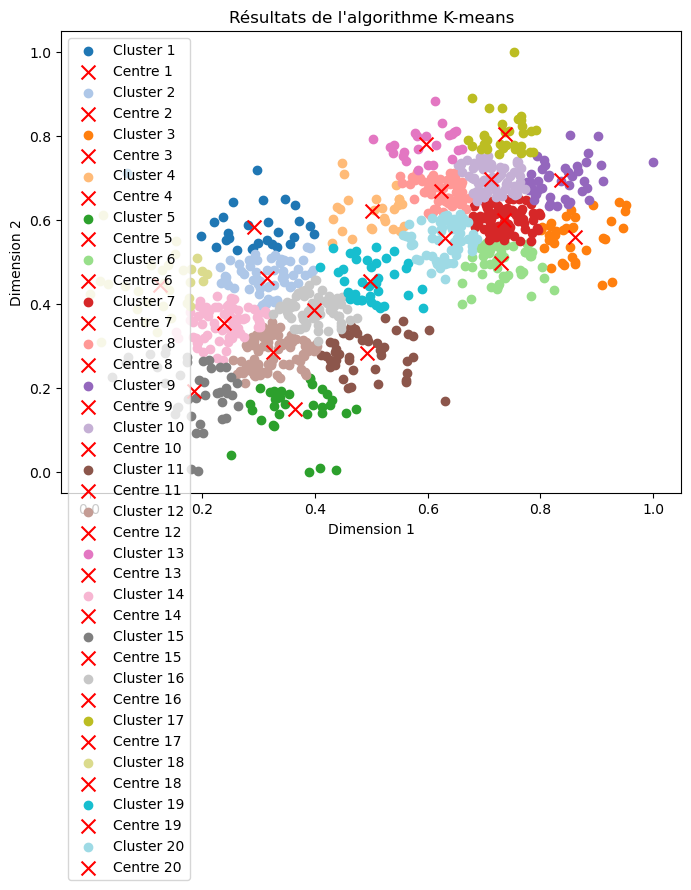

In [228]:
# On divise epsilon par 100

np.random.seed(2023)   

val_k = 20
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.0005, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)

Epsilon détermine le seuil de variation minimale de l'inertie entre deux itérations consécutives pour considérer que l'algorithme a convergé.

Si on le diminue :

- l'algorithme devra effectuer plus d'itérations avant de considérer que l'inertie a suffisamment diminué pour terminer.
- La convergence plus stricte peut conduire à un résultat plus précis, car l'algorithme sera plus sensible aux petites variations dans les centres des clusters. Cependant, cela peut aussi augmenter le temps de calcul.
- Si trop petit, l'algorithme pourrait converger sur un résultat trop précis, ce qui pourrait être inutile si les différences sont négligeables d'un point de vue pratique.


Si on l'augmente :

- l'algorithme arrêtera plus tôt, même si les changements dans les centres de clusters ne sont pas entièrement stabilisés. Donc devient imprécis.
- Gain de temps mais solution moins optimale. Si l'objectif est de gagner du temps de calcul, cette approche pourrait être acceptable, mais elle pourrait également réduire la qualité de la solution finale.

Fixer une valeur pour max_iter (le nombre maximum d'itérations) :

- Si max_itermax_iter est trop faible :
  - L'algorithme risque de ne pas converger complètement.
  - L'inertie pourrait ne pas être minimale ou proche du minimum, ce qui signifie que les clusters formés pourraient ne pas être les plus représentatifs.
  - Clusters moins précis ou mal définis
  - 
- Si max_itermax_iter est trop élevé :
  - L'algorithme prendra plus de temps à s'exécuter.
  - Cela peut entraîner un gaspillage de ressources (temps de calcul et mémoire) sans amélioration réelle des résultats.

<font size="+1" color="RED"><b>[Q]</b></font>  Expérimenter l'algorithme des k-moyennes sur les données de la base `base_Paris` vue dans le TDTME précédent.

Vous pouvez afficher les résultats obtenus avec le clustering hiérarchique afin de trouver une bonne valeur pour $K$.
